In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Zad1

In [2]:
def autocov_est(h,x):
    n = len(x)
    x_sr = np.mean(x)
    suma = 0
    for i in range(n-h):
        suma += (x[i] - x_sr)*(x[i+h] - x_sr) 
    return 1/n * suma

def autocorr_est(h,x):
    return autocov_est(h,x)/autocov_est(0,x)

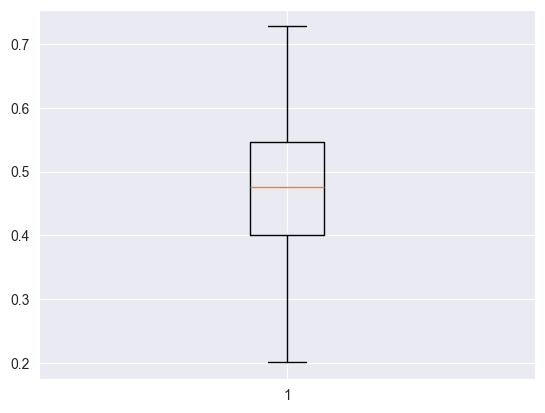

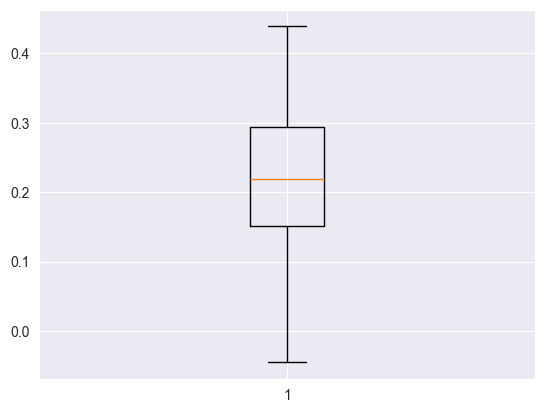

In [3]:
fi1 = 0.5
fi2 = 0.25
MC = 100
n = 100

fi1_est = []
fi2_est = []
for i in range(MC):
    Xt = np.zeros(n)
    Zt = np.random.normal(0,1,n)
    for t in range(2, n):
        Xt[t] = fi1*Xt[t-1] + fi2*Xt[t-2] + Zt[t]
    fi1_est.append(autocorr_est(1,Xt) * (1 - autocorr_est(2,Xt))/(1 - autocorr_est(1,Xt)**2))
    fi2_est.append((autocorr_est(2,Xt) - autocorr_est(1,Xt)**2)/(1 - autocorr_est(1,Xt)**2))


plt.boxplot(fi1_est)
plt.show()
plt.boxplot(fi2_est)
plt.show()

# Zad2

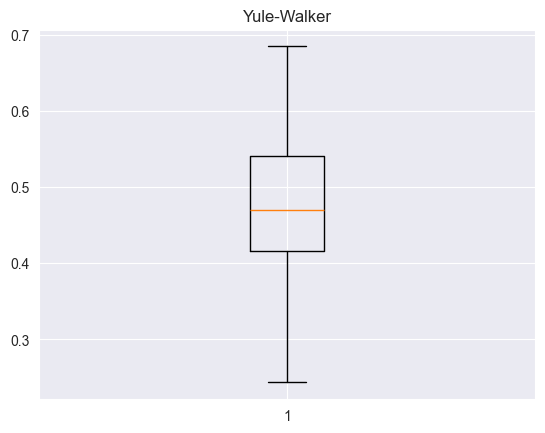

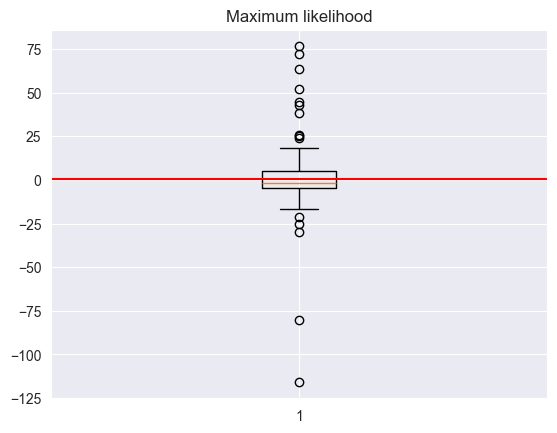

In [4]:
fi = 0.5
MC = 100
n = 100

fi_yw = []
fi_ml = []
for i in range(MC):
    Xt = np.zeros(n)
    Zt = np.random.normal(0,1,n)
    for t in range(2, n):
        Xt[t] = fi*Xt[t-1] + Zt[t]
    fi_yw.append(autocov_est(1,Xt)/autocov_est(0,Xt))
    fi_ml.append(np.sum(Xt[2:]*Xt[1:-1])/np.sum(Xt[2:-1]))
    
plt.boxplot(fi_yw)
plt.title('Yule-Walker')
plt.show()
plt.boxplot(fi_ml)
plt.title('Maximum likelihood')
plt.axhline(y=fi, color='r')
plt.show()

# Zad3

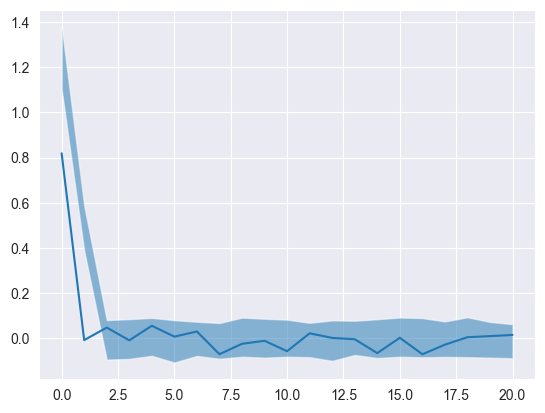

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def autocov_est(h, x):
    n = len(x)
    x_sr = np.mean(x)
    suma = 0
    for i in range(n - h):
        suma += (x[i] - x_sr) * (x[i + h] - x_sr)
    return 1 / n * suma

def autocorr_est(h, x):
    return autocov_est(h, x) / autocov_est(0, x)

theta = 0.5
sigma = 1
h_list = np.arange(0, 21)
MC = 100
n = 1000
conf_level = 0.95

acf_values = []
acvf_values = []
for _ in range(MC):
    Zt = np.random.normal(0, np.sqrt(sigma), n + 1)
    Xt = Zt[1:] + theta * Zt[:-1]
    acf = []
    acvf = []
    for h in h_list:
        acf.append(autocorr_est(h, Xt))
        acvf.append(autocov_est(h, Xt))
    acf_values.append(acf)
    acvf_values.append(acvf)

gamma = np.zeros((len(h_list), len(h_list)))
for i in range(len(h_list)):
    for j in range(len(h_list)):
        gamma[i, j] = autocov_est(np.abs(i-j),Xt)

gamma_inv = np.linalg.inv(gamma)
fi = gamma_inv @ acf_values[0]

lacvf = np.quantile(acvf_values, (1 - conf_level) / 2, axis=0)
uacvf = np.quantile(acvf_values, (1 + conf_level) / 2, axis=0)

plt.plot(h_list, fi)
plt.fill_between(h_list, lacvf, uacvf, alpha=0.5)
plt.show()